# Networkx Bipartite Graph

Turn matrix to bipartite graph:

https://petamind.com/create-bipartite-graph-from-a-rating-matrix/



Sources: 

https://networkx.org/documentation/stable/reference/algorithms/bipartite.html#bipartite-graph-algorithms
[DONE]

https://ericmjl.github.io/Network-Analysis-Made-Simple/04-advanced/01-bipartite/

https://towardsdatascience.com/matching-of-bipartite-graphs-using-networkx-6d355b164567

https://doc.sagemath.org/html/en/reference/graphs/sage/graphs/bipartite_graph.html

https://stackoverflow.com/questions/35472402/how-do-display-bipartite-graphs-with-python-networkx-package

https://github.com/marblet/BiMLPA



Papers about community detection in bipartite graph:

https://journals.aps.org/pre/abstract/10.1103/PhysRevE.76.066102#fulltext

https://royalsocietypublishing.org/doi/full/10.1098/rsos.140536

https://besjournals.onlinelibrary.wiley.com/doi/10.1111/2041-210X.12139


Algorithms for community detection in bipartite graph:

https://louvain-igraph.readthedocs.io/en/latest/multiplex.html





### SW: network visualization is also really important! Network is a fancy stuff visually.

https://ericmjl.github.io/Network-Analysis-Made-Simple/01-introduction/03-viz/

https://plotly.com/python/network-graphs/

https://stackoverflow.com/questions/60100006/visualize-bipartite-network-graph-created-using-pandas-dataframe

https://stackoverflow.com/questions/27084004/bipartite-graph-in-networkx/27085151



In [37]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

In [3]:
from networkx.algorithms import bipartite

### Networkx Documentation

Source: https://networkx.org/documentation/stable/reference/algorithms/bipartite.html#bipartite-graph-algorithms


In [93]:
B = nx.Graph()
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(["a", "b", "c"], bipartite=1)
B.add_edges_from([(1, "a"), (1, "b"), (2, "b"), (2, "c"), (3, "c"), (4, "a")])

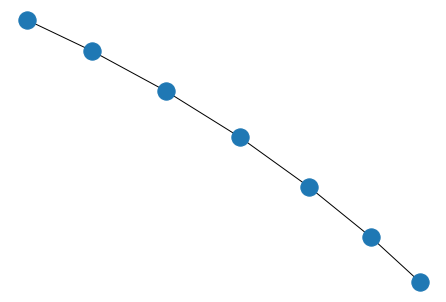

In [5]:
nx.draw(B)

In [6]:
nx.is_connected(B)

True

In [7]:
bottom_nodes, top_nodes = bipartite.sets(B) # separate the two sets. 

In [8]:
bipartite.sets(B)

({1, 2, 3, 4}, {'a', 'b', 'c'})

In [ ]:
# sw: syntax to get node data.
top_nodes = {n for n, d in B.nodes(data=True) if d["bipartite"] == 0}

In [10]:
for n, d in B.nodes(data=True):
    print(n, d)

1 {'bipartite': 0}
2 {'bipartite': 0}
3 {'bipartite': 0}
4 {'bipartite': 0}
a {'bipartite': 1}
b {'bipartite': 1}
c {'bipartite': 1}


In [12]:
top_nodes

{'a', 'b', 'c'}

In [11]:
bottom_nodes = set(B) - top_nodes

Density measures the number of existing edges divided by all possible number of edges.

In [14]:
print(round(bipartite.density(B, bottom_nodes), 2))

0.5


The following projection folds the bipartite graph and maintain the adjacency matrix.

In [15]:
# project to only top nodes
G = bipartite.projected_graph(B, top_nodes)

In [33]:
G.edges(data = True) # no weights here.

EdgeDataView([('c', 'b', {}), ('b', 'a', {})])

In [23]:
# project to only bottom nodes
G_ = bipartite.projected_graph(B, bottom_nodes)

In [24]:
G_.edges()

EdgeView([(1, 2), (1, 4), (2, 3)])

In [31]:
G_w = bipartite.weighted_projected_graph(B, top_nodes)

In [32]:
G_w.edges(data = True) # You see the weights here.

EdgeDataView([('c', 'b', {'weight': 1}), ('b', 'a', {'weight': 1})])

Generate a random bipartite graph

In [25]:
RB = bipartite.random_graph(5, 7, 0.2)

In [26]:
RB_top = {n for n, d in RB.nodes(data=True) if d["bipartite"] == 0}

In [27]:
RB_bottom = set(RB) - RB_top

In [28]:
list(RB_top)

[0, 1, 2, 3, 4]

In [29]:
list(RB_bottom)

[5, 6, 7, 8, 9, 10, 11]

### Boston Activity - Matrix to a Bipartite Graph

My own data, but learn from the source here:

https://petamind.com/create-bipartite-graph-from-a-rating-matrix/#The_rating_data


In [58]:
from networkx import *

In [38]:
with open('./data/boston_activities/sample_2000.pickle', 'rb') as f:
    df = pickle.load(f)

In [39]:
df

,user,duration,ini_dat,lon_medoid,lat_medoid,GEOID,home_lon_med,home_lat_med,GEOID_home,quant,fsq_id,cat,distPOI,disthome,hour_of_day,day_of_week,weekday,weekend
0,00033a3bb5f07e32dc00a69de6c8b4f73d05e5d08d14a8...,720,1.479658e+09,-71.119389,42.419606,250173392004,-71.119387,42.419602,250173392004,2,4e04d889e4cd4839a4d50178,Financial / Legal,0.000512,0.000461,13,0,False,True
1,00033a3bb5f07e32dc00a69de6c8b4f73d05e5d08d14a8...,1082,1.480092e+09,-71.119313,42.419536,250173392004,-71.119387,42.419602,250173392004,2,4e04d889e4cd4839a4d50178,Financial / Legal,0.000425,0.009584,13,5,True,False
2,00033a3bb5f07e32dc00a69de6c8b4f73d05e5d08d14a8...,1605,1.481216e+09,-71.133725,42.421113,250173393003,-71.119387,42.419602,250173392004,2,52c32ef8498eedc2905632b3,Desserts,0.000146,1.188870,13,4,True,False
3,00033a3bb5f07e32dc00a69de6c8b4f73d05e5d08d14a8...,480,1.481303e+09,-71.206795,42.427230,250173581003,-71.119387,42.419602,250173392004,2,4a7efa56f964a52063f21fe3,Grocery Store,0.000183,7.224559,13,5,True,False
4,00033a3bb5f07e32dc00a69de6c8b4f73d05e5d08d14a8...,9082,1.481733e+09,-71.117717,42.400757,250173505001,-71.119387,42.419602,250173392004,2,55295069498ea157a1d3ef10,Ice Cream,0.000063,2.099991,13,3,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,00b473f99b0c02ad7e9197e43e7d19011ada6997ba8f6e...,471,1.480956e+09,-71.204587,42.150327,250214112001,-71.203287,42.149734,250214112001,3,5087aa5ce4b0543814034b15,Factory,0.000583,0.125783,13,1,True,False
1997,00b473f99b0c02ad7e9197e43e7d19011ada6997ba8f6e...,6056,1.480957e+09,-71.203566,42.149856,250214112001,-71.203287,42.149734,250214112001,3,5087aa5ce4b0543814034b15,Factory,0.000748,0.026655,13,1,True,False
1998,00b473f99b0c02ad7e9197e43e7d19011ada6997ba8f6e...,733,1.481042e+09,-71.204772,42.150417,250214112001,-71.203287,42.149734,250214112001,3,5087aa5ce4b0543814034b15,Factory,0.000756,0.144090,13,2,True,False
1999,00b473f99b0c02ad7e9197e43e7d19011ada6997ba8f6e...,4672,1.481043e+09,-71.203334,42.149593,250214112001,-71.203287,42.149734,250214112001,3,5087aa5ce4b0543814034b15,Factory,0.001098,0.016160,13,2,True,False


In [50]:
# Print basics
print("Unique users: ", len(np.unique(df.user)))
print("Unique locations: ", len(np.unique(df.GEOID)))
print("Shape of the dataframe is: ", df.shape)

Unique users:  166
Unique locations:  575
Shape of the dataframe is:  (2001, 18)


In [42]:
# create a graph
G = nx.Graph()

In [43]:
# Add nodes. (SW: leant how to add nodes to the graph!)
G.add_nodes_from(df.user, bipartite=0)
G.add_nodes_from(df.GEOID, bipartite=1)

In [56]:
# Add weights for edges.
count_df = df.groupby(['user', 'GEOID']).count().iloc[:, 0].reset_index()
count_df = count_df.rename(columns = {'duration':'activity_counts'})
# count_df

# sw: weights are added through a list of tuples.
G.add_weighted_edges_from([(user, GEOID, activity_counts) 
                           for (user, GEOID, activity_counts) in count_df[['user', 'GEOID', 'activity_counts']].to_numpy()])

# len(list(G.nodes))

In [59]:
print(info(G)) # sw: info comes from the networkx.*

Name: 
Type: Graph
Number of nodes: 741
Number of edges: 770
Average degree:   2.0783


In [60]:
nx.is_bipartite(G)

True

In [64]:
nx.is_connected(G)

False

In [71]:
# print graph descriptions.
# SW: the first five cannot be printed since the graph is not connected.
# Question: What are the first five parameters in a graph?
# print("radius: %d" % nx.radius(G))
# print("diameter: %d" % nx.diameter(G))
# print("eccentricity: %s" % nx.eccentricity(G))
# print("center: %s" % nx.center(G))
# print("periphery: %s" % nx.periphery(G))
print("density: %s" % density(G))

density: 0.002808476492687019


Visualize the bipartite graph

In [72]:
color_map = []
for node in G.nodes:
    if len(str(node)) > 12: # separate user id and geo id.
        color_map.append('yellow') # first user
    else:
        color_map.append('green') # then geo

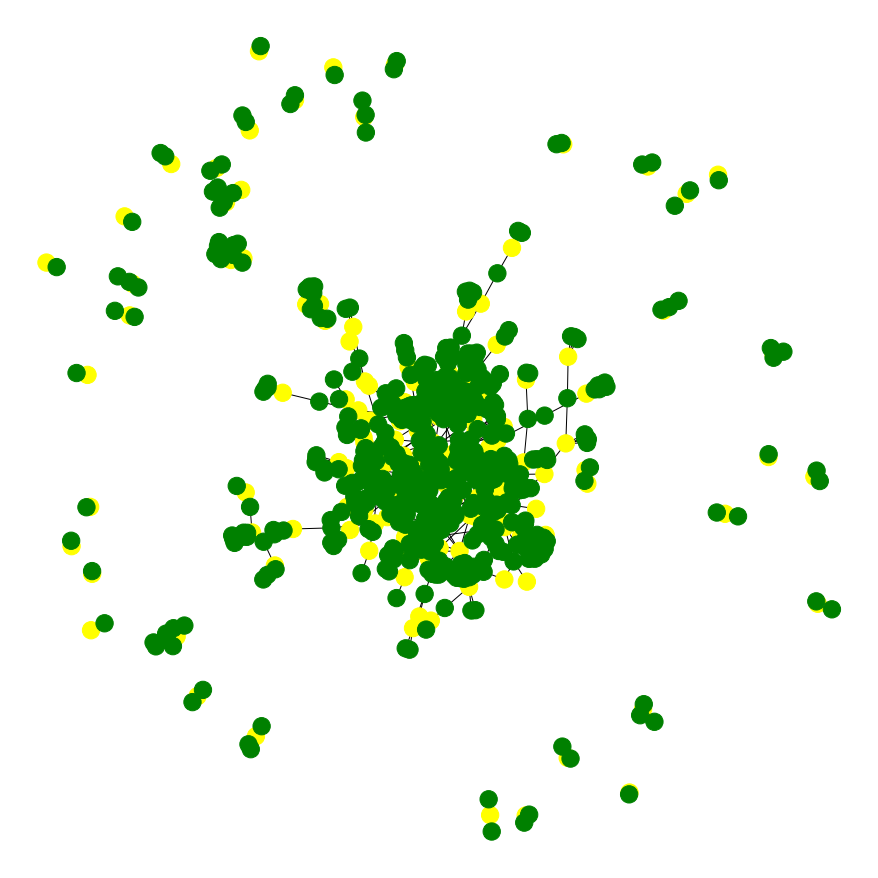

In [73]:
# Visualization 1
pos = nx.spring_layout(G)
plt.figure(3,figsize=(12,12)) 
nx.draw(G, pos, node_color=color_map) # use node color to separate node categories. 
plt.show()

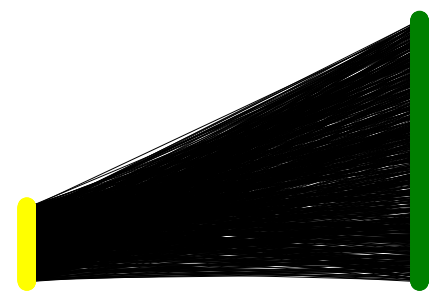

In [84]:
# Visualization 2
# Separate two types of node
user_nodes = {n for n, d in G.nodes(data=True) if d["bipartite"] == 0}
geo_nodes = set(G) - user_nodes

pos = dict()
# sw: (1, i) seems to be the location on the visualization. n is the indicator for nodes.
pos.update((n, (1, i)) for i, n in enumerate(user_nodes)) # put nodes from user at x=1
pos.update((n, (2, i)) for i, n in enumerate(geo_nodes)) # put nodes from geo at x=2
nx.draw(G, pos=pos, node_color=color_map)
plt.show()


#### Network analysis made simple - Bipartite graph

https://ericmjl.github.io/Network-Analysis-Made-Simple/04-advanced/01-bipartite/

SW: Hmm, this single person wants to develop a new network analysis package. Unfortunately, I cannot run the first line.

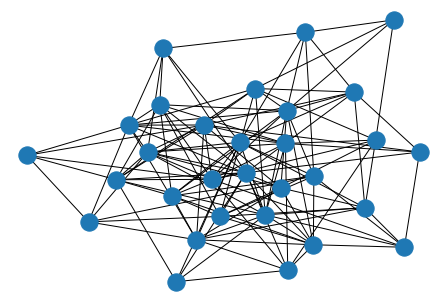

In [101]:
import networkx as nx
import matplotlib.pyplot as plt

er = nx.erdos_renyi_graph(30, 0.3)
nx.draw(er)
plt.show()

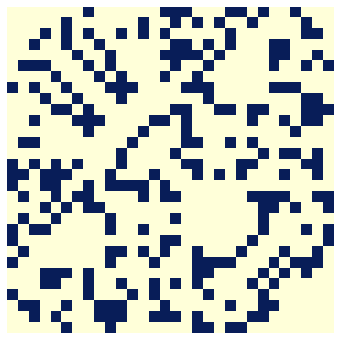

In [102]:
from nxviz.plots import MatrixPlot

m = MatrixPlot(er)
m.draw()
plt.show()

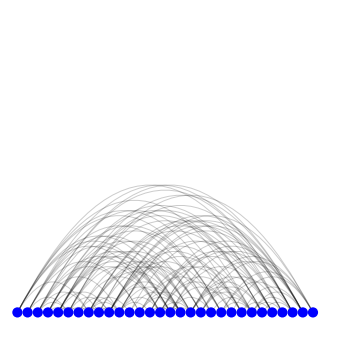

In [103]:
from nxviz.plots import ArcPlot

a = ArcPlot(er)
a.draw()
plt.show()

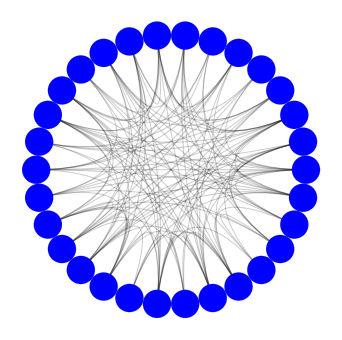

In [104]:
from nxviz.plots import CircosPlot

c = CircosPlot(er)
c.draw()
plt.show()

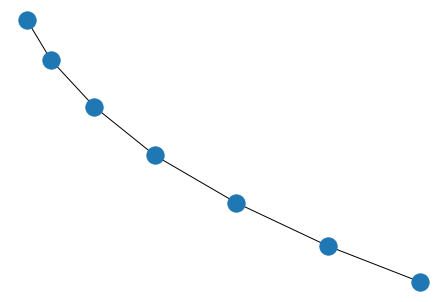

In [96]:
nx.draw(B)

In [99]:
import nxviz as nv
import matplotlib.pyplot as plt

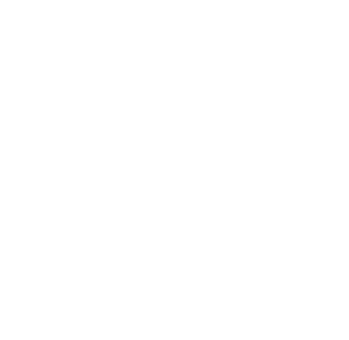

In [100]:
nv.plots.ArcPlot(B)

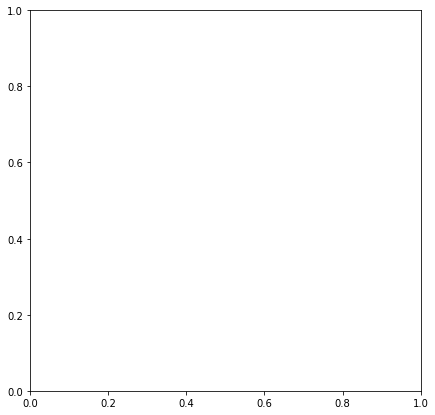

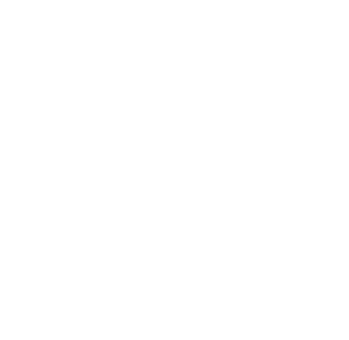

In [97]:
fig, ax = plt.subplots(figsize=(7, 7))
nv.plots.CircosPlot(B, sort_by="degree", group_by="bipartite", node_color_by="bipartite", node_enc_kwargs={"size_scale": 3})


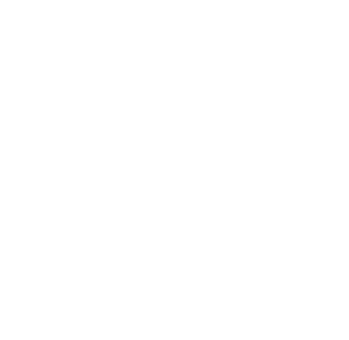

In [95]:
nv.plots.MatrixPlot(B)